In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp

In [2]:
import os
os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\MNIST')
data=pd.read_csv('train.csv')

In [3]:
label=data['label']
data=data.drop('label',axis=1)

In [4]:
data.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


2 — Compute covariance matrix

In [7]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


3 — Compute eigenvalue and eigenvector

#### finding the top two eigen-values and corresponding eigen-vectors 
#### for projecting onto a 2-Dim space.
#### https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html

In [12]:
from scipy.linalg import eigh
# the parameter ‘eigvals’ is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

In [13]:
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

Shape of eigen vectors =  (784, 2)


In [81]:
print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Updated shape of eigen vectors =  (2, 784)


In [14]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print(new_coordinates.shape)

(2, 42000)


In [10]:
# Example of VSTACK
a = np.array([1, 2, 3])
print(a.shape)
b = np.array([2, 3, 4])
print(b.shape)
pd.DataFrame(np.vstack((a,b)).T)

(3,)
(3,)


,0,1
0,1,2
1,2,3
2,3,4


In [84]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates, label)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


/home/exe002/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


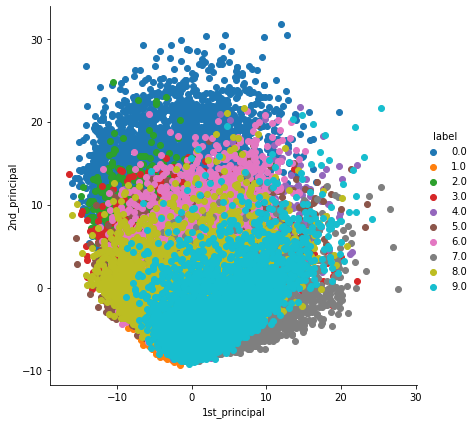

In [88]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

There is a lot of overlapping among classes means PCA not very good for the high dimensional dataset. Very few classes can be separated but most of them are mixed. PCA is mainly used for dimensionality reduction, not for visualization. To visualize high dimension data, we mostly use T-SNE

PCA for dimension reduction

In [18]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA(n_components = 784)
# PCA for dimensionality redcution (non-visualization)
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

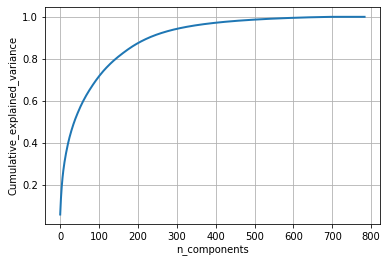

In [19]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [22]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 784)
# PCA for dimensionality redcution (non-visualization)
pca_data = pca.fit_transform(sample_data)
pca_data=pd.DataFrame(pca_data)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-5.140478,-5.226445,3.887001,-0.901512,4.929111,2.035413,4.706946,-4.767184,0.230958,-1.460962,...,-0.000000e+00,-0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
1,19.292332,6.032996,1.308148,-2.383294,3.095188,-1.791095,-3.772790,0.153865,-4.115192,-4.299357,...,2.456232e-16,2.676008e-16,0.0,0.0,0.0,0.0,-5.950691e-15,-1.059648e-15,3.000390e-15,-1.911065e-15
2,-7.644503,-1.705813,2.289326,2.241135,5.094426,-4.152058,-1.012004,1.732559,0.436261,-0.073687,...,1.402711e-16,1.705257e-16,0.0,0.0,0.0,0.0,-6.682179e-15,-1.990758e-15,3.091608e-15,-1.879086e-15
3,-0.474207,5.836139,2.008617,4.271106,2.377777,2.179913,4.398030,-0.353712,0.992308,5.501253,...,4.032218e-17,-1.317747e-16,0.0,0.0,0.0,0.0,-6.001745e-15,-1.554977e-15,1.081516e-15,-5.012035e-16
4,26.559574,6.024818,0.933179,-3.012645,9.489179,-2.331195,-6.149597,-1.783637,-4.123302,-5.757361,...,2.014238e-17,2.895320e-16,0.0,0.0,0.0,0.0,1.354092e-14,-1.505323e-15,2.263573e-15,-6.140125e-16


In [23]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 300)
# PCA for dimensionality redcution (non-visualization)
pca_data = pca.fit_transform(sample_data)
pca_data=pd.DataFrame(pca_data)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-5.140478,-5.226445,3.887001,-0.901512,4.929111,2.035413,4.706946,-4.767184,0.230958,-1.460962,...,0.186850,-0.250027,0.155587,0.054389,0.100089,-0.234413,-0.243503,0.025103,-0.474519,0.011323
1,19.292332,6.032996,1.308148,-2.383294,3.095188,-1.791095,-3.772790,0.153865,-4.115191,-4.299357,...,0.123104,-0.013233,-0.595507,0.460744,0.488449,0.287271,0.157265,0.217794,0.093615,-0.168768
2,-7.644503,-1.705813,2.289326,2.241135,5.094426,-4.152058,-1.012004,1.732559,0.436262,-0.073687,...,0.185082,0.094426,0.127598,0.206938,0.174374,-0.164572,0.126374,0.344347,0.017771,0.150041
3,-0.474207,5.836139,2.008617,4.271106,2.377777,2.179913,4.398029,-0.353713,0.992309,5.501253,...,-1.381446,-0.875324,0.478806,-0.660104,-0.798068,1.107886,1.609837,0.240195,-0.056880,-0.903778
4,26.559574,6.024818,0.933180,-3.012645,9.489179,-2.331195,-6.149597,-1.783637,-4.123301,-5.757361,...,-0.143526,-0.691937,-1.063897,0.186669,-0.700977,1.153674,-0.458229,-0.113689,-0.296278,0.735769
